In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import glm_model as gm
from glm_utils import *
import tensorflow as tf

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
import pickle

pkl_file = open('./boc/formatted/L')
(l_best_model, l_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/L_RS')
(l_rs_best_model, l_rs_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LN_Exp')
(LN_exp_best_model, LN_exp_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LN_Relu')
(LN_relu_best_model, LN_relu_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LN_RS_Exp')
(LN_rs_exp_best_model, LN_rs_exp_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LN_RS_Relu_Sigmoid')
(LN_rs_relu_sig_best_model, LN_rs_Relu_Sigmoid_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LN_Sig')
(LN_sig_best_model, LN_sig_all_models) = pickle.load(pkl_file)
pkl_file.close()

In [36]:
#first let's deal with the getting the LN best models. 

LN_best = {k: {} for k in l_best_model.keys()}


for k in l_best_model.keys():
    best_model =  LN_exp_best_model[k]
    non_lin = 'exponential'
    
    if LN_relu_best_model[k][0] > best_model[0]:
        best_model = LN_relu_best_model[k]
        non_lin = 'relu'
        
    if LN_sig_best_model[k][0] > best_model[0]:
        best_model =  LN_sig_best_model[k]
        non_lin = 'sigmoid'
        
    LN_best[k]['non_lin'] = non_lin
    LN_best[k]['n_pcs'] = best_model[1][1]
    LN_best[k]['explained_variance'] = best_model[0]

In [37]:
import pprint

lin_var = [];
LN_var = [];


for k in LN_best.keys():
    
    lin_var.append(l_best_model[k][0])
    LN_var.append(LN_best[k]['explained_variance'])
    
    print 'Best LN model cell', k, ': \n Explained var:', round(LN_best[k]['explained_variance'], 2), '\n n_pcs:', LN_best[k]['n_pcs'], '\n non linearity:', LN_best[k]['non_lin'], '\n'
    
    print 'Best linear model cell', k, ': \n Explained var:', round(l_best_model[k][0], 2), '\n n_pcs:', l_best_model[k][1][1], '\n'
    

Best LN model cell 517442753 : 
 Explained var: 0.05 
 n_pcs: 15 
 non linearity: relu 

Best linear model cell 517442753 : 
 Explained var: 0.01 
 n_pcs: 68.6734693878 

Best LN model cell 517444738 : 
 Explained var: 0.07 
 n_pcs: 100 
 non linearity: relu 

Best linear model cell 517444738 : 
 Explained var: 0.01 
 n_pcs: 32.8571428571 

Best LN model cell 517443331 : 
 Explained var: 0.05 
 n_pcs: 10 
 non linearity: relu 

Best linear model cell 517443331 : 
 Explained var: 0.01 
 n_pcs: 44.7959183673 

Best LN model cell 517442436 : 
 Explained var: 0.05 
 n_pcs: 65 
 non linearity: sigmoid 

Best linear model cell 517442436 : 
 Explained var: 0.01 
 n_pcs: 156.224489796 

Best LN model cell 517445575 : 
 Explained var: 0.08 
 n_pcs: 100 
 non linearity: relu 

Best linear model cell 517445575 : 
 Explained var: 0.0 
 n_pcs: 40.8163265306 

Best LN model cell 517444426 : 
 Explained var: 0.06 
 n_pcs: 50 
 non linearity: relu 

Best linear model cell 517444426 : 
 Explained var: 

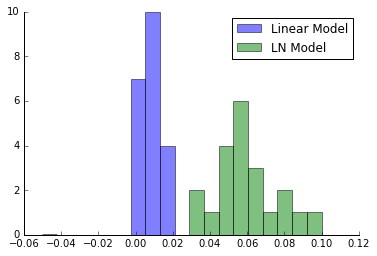

In [38]:
bins = np.linspace(-.05, .1, 20)

ax = plt.subplot(111)
plt.hist(lin_var, bins, alpha=0.5, label='Linear Model')
plt.hist(LN_var, bins, alpha=0.5, label='LN Model')
plt.legend(loc='upper right')
simpleaxis(ax)
plt.show()

In [43]:
#now let's deal with getting the best models with running speed

LN_rs_best = {k: {} for k in l_best_model.keys()}
non_lin_dict = {0: 'exponential', 1: 'sigmoid', 2: 'relu'}

for k in l_best_model.keys():
    best_model =  LN_rs_relu_sig_best_model[k]
    
    if LN_rs_exp_best_model[k][0] > best_model[0]:
        best_model = LN_rs_exp_best_model[k]

    LN_rs_best[k]['non_lin'] = non_lin_dict[best_model[1][0]]
    LN_rs_best[k]['n_pcs'] = best_model[1][1]
    LN_rs_best[k]['explained_variance'] = best_model[0]

In [44]:
#now let's deal with runnign speed

lin_rs_var = [];
LN_rs_var = [];


for k in LN_best.keys():
    
    lin_rs_var.append(l_rs_best_model[k][0])
    LN_rs_var.append(LN_rs_best[k]['explained_variance'])
    
    print 'Best LN model cell', k, ': \n Explained var:', round(LN_rs_best[k]['explained_variance'], 2), '\n n_pcs:', LN_rs_best[k]['n_pcs'], '\n non linearity:', LN_rs_best[k]['non_lin'], '\n'
    
    print 'Best linear model cell', k, ': \n Explained var:', round(l_rs_best_model[k][0], 2), '\n n_pcs:', l_rs_best_model[k][1][1], '\n'
    

Best LN model cell 517442753 : 
 Explained var: 0.2 
 n_pcs: 1 
 non linearity: exponential 

Best linear model cell 517442753 : 
 Explained var: 0.08 
 n_pcs: 77.5510204082 

Best LN model cell 517444738 : 
 Explained var: 0.06 
 n_pcs: 106 
 non linearity: exponential 

Best linear model cell 517444738 : 
 Explained var: 0.01 
 n_pcs: 6.12244897959 

Best LN model cell 517443331 : 
 Explained var: 0.05 
 n_pcs: 96 
 non linearity: exponential 

Best linear model cell 517443331 : 
 Explained var: 0.04 
 n_pcs: 87.7551020408 

Best LN model cell 517442436 : 
 Explained var: 0.35 
 n_pcs: 6 
 non linearity: exponential 

Best linear model cell 517442436 : 
 Explained var: 0.16 
 n_pcs: 77.5510204082 

Best LN model cell 517445575 : 
 Explained var: 0.34 
 n_pcs: 1 
 non linearity: exponential 

Best linear model cell 517445575 : 
 Explained var: 0.15 
 n_pcs: 97.9591836735 

Best LN model cell 517444426 : 
 Explained var: 0.21 
 n_pcs: 1 
 non linearity: exponential 

Best linear model 

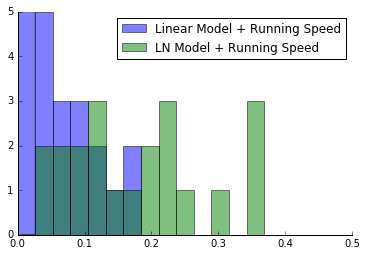

In [47]:
bins = np.linspace(0, .5, 20)

ax = plt.subplot(111)
plt.hist(lin_rs_var, bins, alpha=0.5, label='Linear Model + Running Speed')
plt.hist(LN_rs_var, bins, alpha=0.5, label='LN Model + Running Speed')
plt.legend(loc='upper right')
simpleaxis(ax)
plt.show()

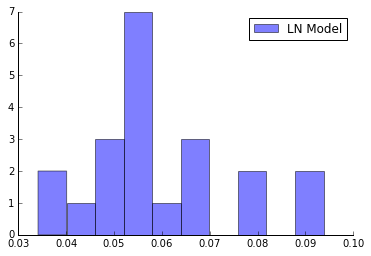

In [70]:
bins = np.linspace(-.05, .4, 10)

ax = plt.subplot(111)
plt.hist(LN_var, alpha=0.5, label='LN Model')
#plt.hist(LN_rs_var, bins, alpha=0.5, label='LN, plus running speed')
plt.legend(loc='upper right')
simpleaxis(ax)
plt.show()

In [71]:
pkl_file = open('./boc/formatted/LNE_exp')
(LNE_exp_best_model, LNE_exp_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LNE_relu')
(LNE_relu_best_model, LNE_relu_all_models) = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LNE_sig')
(LNE_sig_best_model, LNE_sig_all_models) = pickle.load(pkl_file)
pkl_file.close()

In [72]:
#first let's deal with the getting the LN best models. 
LNE_best = {k: {} for k in l_best_model.keys()}


for k in l_best_model.keys():
    best_model =  LNE_exp_best_model[k]
    non_lin = 'exponential'
    
    if LNE_relu_best_model[k][0] > best_model[0]:
        best_model = LNE_relu_best_model[k]
        non_lin = 'relu'
        
    if LNE_sig_best_model[k][0] > best_model[0]:
        best_model =  LNE_sig_best_model[k]
        non_lin = 'sigmoid'
        
    LNE_best[k]['non_lin'] = non_lin
    LNE_best[k]['n_pcs'] = best_model[1][1]
    LNE_best[k]['explained_variance'] = best_model[0]

In [73]:
LNE_var = [];


for k in LN_best.keys():
    
    LNE_var.append(LNE_best[k]['explained_variance'])
    
    print 'Best LNE model cell', k, ': \n Explained var:', round(LNE_best[k]['explained_variance'], 2), '\n n_pcs:', LNE_best[k]['n_pcs'], '\n non linearity:', LNE_best[k]['non_lin'], '\n'
    
    
    

Best LNE model cell 517442753 : 
 Explained var: 0.08 
 n_pcs: 1 
 non linearity: exponential 

Best LNE model cell 517444738 : 
 Explained var: 0.05 
 n_pcs: 20 
 non linearity: sigmoid 

Best LNE model cell 517443331 : 
 Explained var: 0.09 
 n_pcs: 55 
 non linearity: relu 

Best LNE model cell 517442436 : 
 Explained var: 0.08 
 n_pcs: 16 
 non linearity: exponential 

Best LNE model cell 517445575 : 
 Explained var: 0.04 
 n_pcs: 50 
 non linearity: sigmoid 

Best LNE model cell 517444426 : 
 Explained var: 0.07 
 n_pcs: 36 
 non linearity: exponential 

Best LNE model cell 517442471 : 
 Explained var: 0.09 
 n_pcs: 90 
 non linearity: relu 

Best LNE model cell 517443181 : 
 Explained var: 0.07 
 n_pcs: 25 
 non linearity: relu 

Best LNE model cell 517443087 : 
 Explained var: 0.06 
 n_pcs: 56 
 non linearity: exponential 

Best LNE model cell 517446833 : 
 Explained var: 0.06 
 n_pcs: 96 
 non linearity: exponential 

Best LNE model cell 517443827 : 
 Explained var: 0.06 
 n_pc

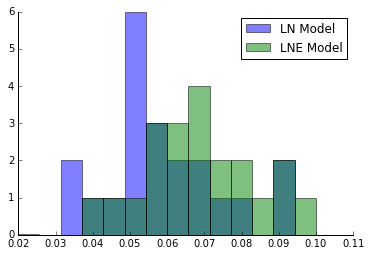

In [74]:
bins = np.linspace(.02, .1, 15)

ax = plt.subplot(111)
plt.hist(LN_var, bins, alpha=0.5, label='LN Model')
plt.hist(LNE_var, bins, alpha=0.5, label='LNE Model')
plt.legend(loc='upper right')
simpleaxis(ax)
plt.show()

In [78]:
print np.mean(LN_var), np.mean(LNE_var)

0.0594841846653 0.0685082667116


In [79]:
from scipy.stats import ttest_ind

print ttest_rel(LN_var, LNE_var)


Ttest_relResult(statistic=-1.836308883523968, pvalue=0.081223003845391523)


In [65]:
pkl_file = open('./boc/formatted/RA_Variance')
Ra_Variance = pickle.load(pkl_file)
pkl_file.close()

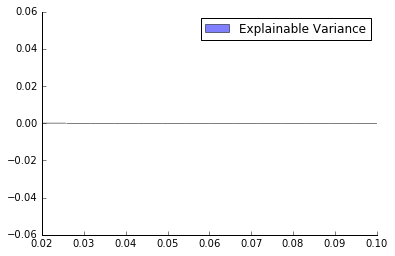

In [67]:
bins = np.linspace(.02, .1, 15)

ax = plt.subplot(111)
plt.hist(Ra_Variance, bins, alpha=0.5, label='Explainable Variance')
plt.legend(loc='upper right')
simpleaxis(ax)
plt.show()

In [68]:
Ra_Variance

0.0040514927618000894